In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
import warnings
warnings.filterwarnings("ignore")

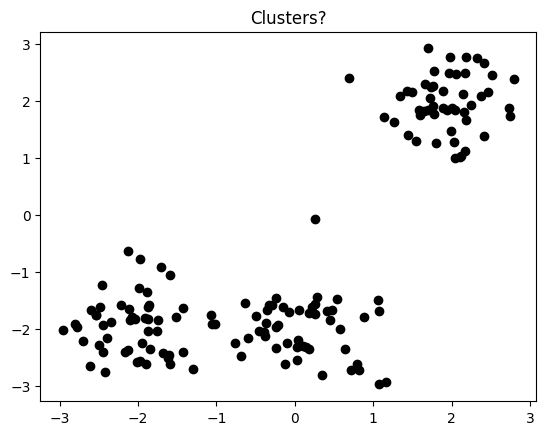

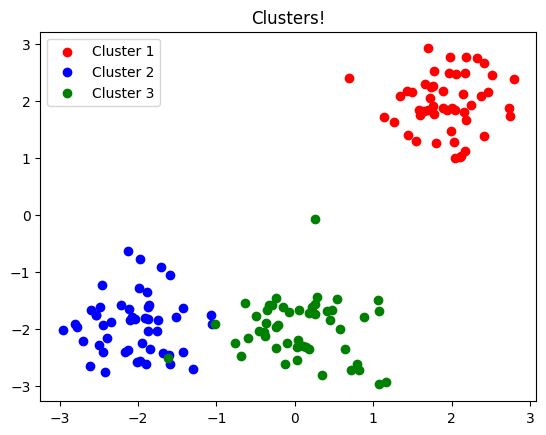

In [3]:
# Generate random data for three clusters
np.random.seed(42)
cluster1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
cluster2 = np.random.normal(loc=[-2, -2], scale=0.5, size=(50, 2))
cluster3 = np.random.normal(loc=[0, -2], scale=0.5, size=(50, 2))

# Plot clusters with all black color
plt.scatter(cluster1[:, 0], cluster1[:, 1], color='black')
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='black')
plt.scatter(cluster3[:, 0], cluster3[:, 1], color='black')
plt.title("Clusters?")
plt.show()

# Plot clusters with distinct colors
plt.scatter(cluster1[:, 0], cluster1[:, 1], color='red', label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='blue', label='Cluster 2')
plt.scatter(cluster3[:, 0], cluster3[:, 1], color='green', label='Cluster 3')
plt.title("Clusters!")
plt.legend()
plt.show()

In [6]:
!pip install scikit-learn_extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip


/home/pgolbus/venvs/jupyter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


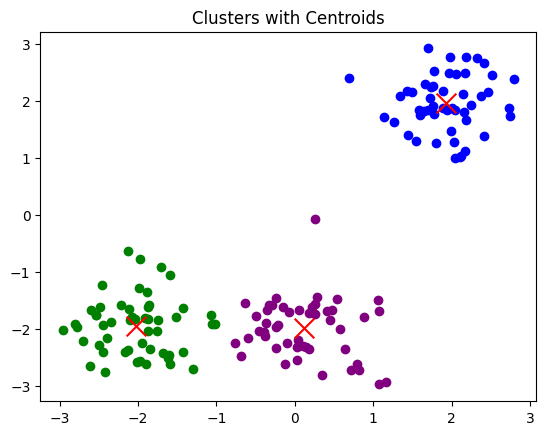

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Generate random data for three clusters
np.random.seed(42)
cluster1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
cluster2 = np.random.normal(loc=[-2, -2], scale=0.5, size=(50, 2))
cluster3 = np.random.normal(loc=[0, -2], scale=0.5, size=(50, 2))

# Combine all data points into a single array
data = np.concatenate((cluster1, cluster2, cluster3), axis=0)

# Perform K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
centroids = kmeans.cluster_centers_

# Define colors for each cluster
colors = ['blue', 'green', 'purple']

# Plot the clusters with different colors and red centroids
for i in range(k):
    cluster_points = data[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i])

plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200)
plt.title("Clusters with Centroids")
plt.show()


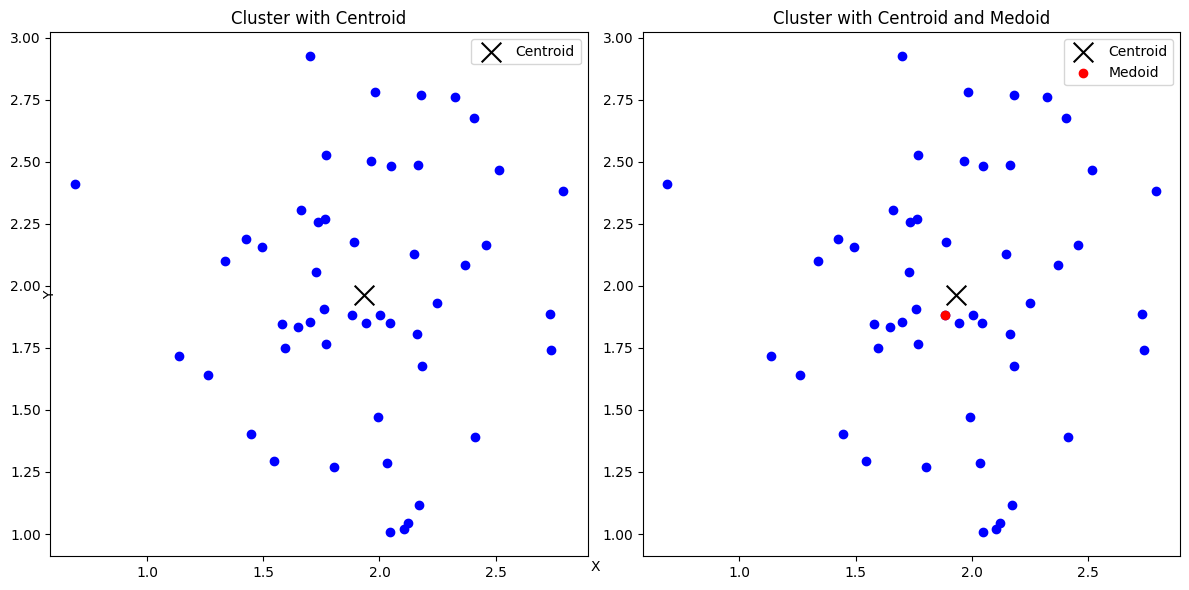

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans

# Generate random data for a single cluster
np.random.seed(42)
cluster = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))

# Perform K-Means clustering
kmeans = KMeans(n_clusters=1, random_state=0).fit(cluster)
centroid = kmeans.cluster_centers_[0]

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=1, random_state=0).fit(cluster)
medoid = cluster[kmedoids.medoid_indices_[0]]

# Set up the subplot with two plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot on the left: Sampled points with centroid
axs[0].scatter(cluster[:, 0], cluster[:, 1], color='blue')
axs[0].scatter(centroid[0], centroid[1], color='black', marker='x', s=200, label='Centroid')
axs[0].legend()
axs[0].set_title("Cluster with Centroid")

# Plot on the right: Sampled points with centroid and medoid
axs[1].scatter(cluster[:, 0], cluster[:, 1], color='blue')
axs[1].scatter(centroid[0], centroid[1], color='black', marker='x', s=200, label='Centroid')
axs[1].scatter(medoid[0], medoid[1], color='red', label='Medoid')
axs[1].legend()
axs[1].set_title("Cluster with Centroid and Medoid")

# Set common axis labels and display the plot
fig.text(0.5, 0.04, 'X', ha='center')
fig.text(0.04, 0.5, 'Y', va='center', rotation='vertical')
plt.tight_layout()
plt.show()


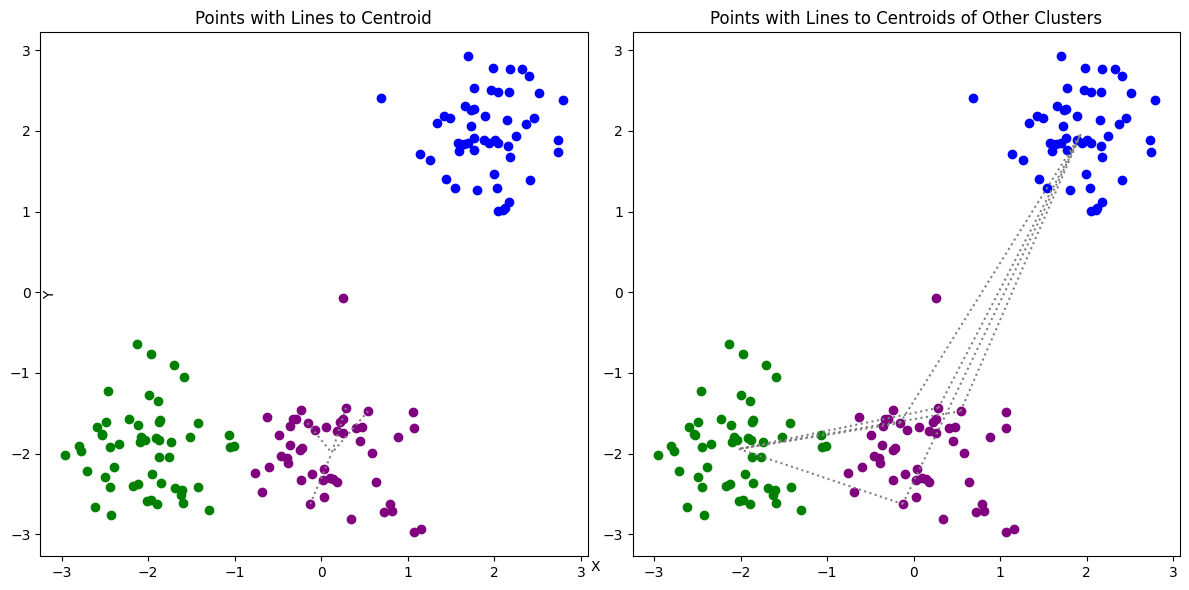

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Generate random data for three clusters
np.random.seed(42)
cluster1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
cluster2 = np.random.normal(loc=[-2, -2], scale=0.5, size=(50, 2))
cluster3 = np.random.normal(loc=[0, -2], scale=0.5, size=(50, 2))

# Combine all data points into a single array
data = np.concatenate((cluster1, cluster2, cluster3), axis=0)

# Perform K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
centroids = kmeans.cluster_centers_

# Define colors for each cluster
colors = ['blue', 'green', 'purple']

# Set up the subplot with two plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot on the left: Clusters with lines to their centroids
axs[0].set_title("Points with Lines to Centroid")
for i in range(k):
    cluster_points = data[kmeans.labels_ == i]
    axs[0].scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i])
    if i == 2:  # Sample four points from the first cluster only
        sample_points = cluster_points[np.random.choice(cluster_points.shape[0], 4, replace=False)]
        for point in sample_points:
            axs[0].plot([point[0], centroids[i, 0]], [point[1], centroids[i, 1]], color='gray', linestyle='dotted')
    # else:
    #    for point in cluster_points:
    #        axs[0].plot([point[0], centroids[i, 0]], [point[1], centroids[i, 1]], color='gray', linestyle='dotted')

# Plot on the right: Points with lines to the centroids of other clusters
axs[1].set_title("Points with Lines to Centroids of Other Clusters")
for i in range(k):
    cluster_points = data[kmeans.labels_ == i]
    axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i])
    if i == 2:  # Connect sampled points from the first cluster to centroids of other clusters
        other_centroids = np.delete(centroids, i, axis=0)
        for point in sample_points:
            for centroid in other_centroids:
                axs[1].plot([point[0], centroid[0]], [point[1], centroid[1]], color='gray', linestyle='dotted')

# Set common axis labels and display the plot
fig.text(0.5, 0.04, 'X', ha='center')
fig.text(0.04, 0.5, 'Y', va='center', rotation='vertical')
plt.tight_layout()
plt.show()


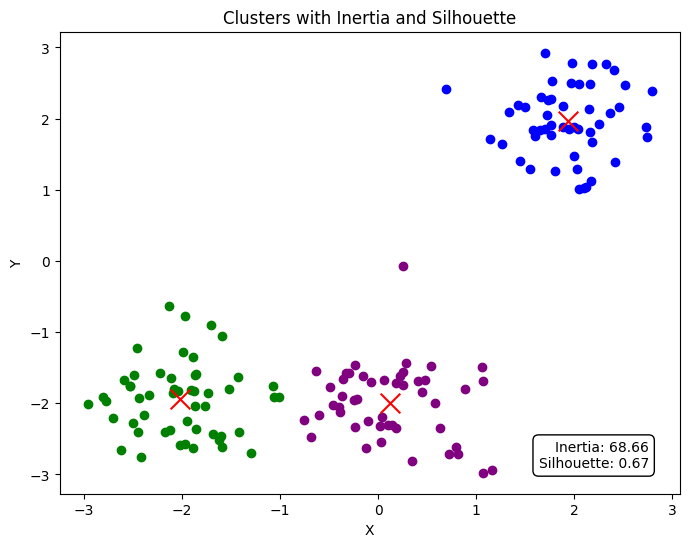

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate random data for three clusters
np.random.seed(42)
cluster1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
cluster2 = np.random.normal(loc=[-2, -2], scale=0.5, size=(50, 2))
cluster3 = np.random.normal(loc=[0, -2], scale=0.5, size=(50, 2))

# Combine all data points into a single array
data = np.concatenate((cluster1, cluster2, cluster3), axis=0)

# Perform K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate Inertia and Silhouette coefficient
inertia = kmeans.inertia_
silhouette = silhouette_score(data, labels)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the clusters
colors = ['blue', 'green', 'purple']
for i in range(k):
    cluster_points = data[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i])

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Clusters with Inertia and Silhouette")

# Add text for Inertia and Silhouette
text = f"Inertia: {inertia:.2f}\nSilhouette: {silhouette:.2f}"
ax.text(0.95, 0.05, text, transform=ax.transAxes, ha='right', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

# Display the plot
plt.show()


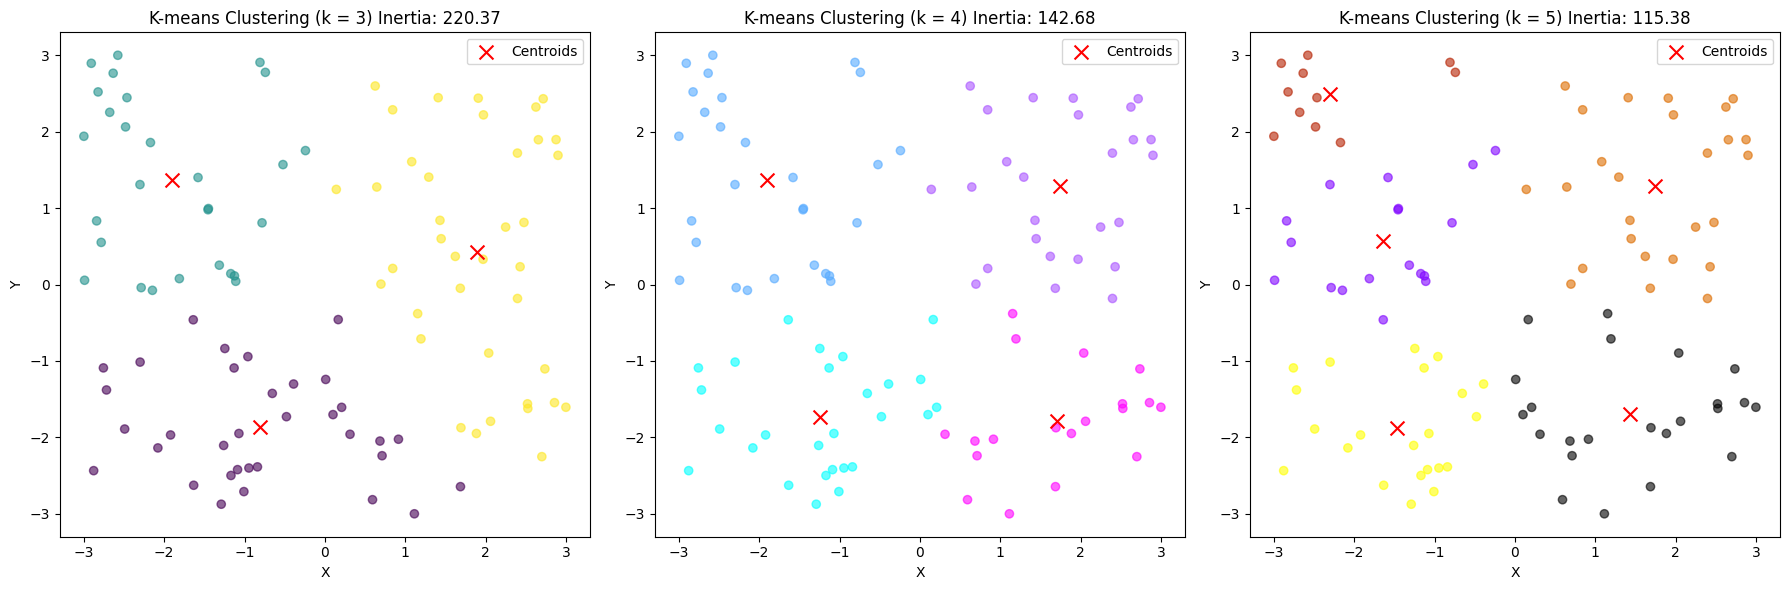

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Generate sparse random data for clustering
np.random.seed(42)
data = np.random.rand(100, 2) * 0.1  # Sparse data

# Scale the data from -3 to 3
scaler = MinMaxScaler(feature_range=(-3, 3))
scaled_data = scaler.fit_transform(data)

# Set up the figure with a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define colormaps for different subplots
colormaps = ['viridis', 'cool', 'gnuplot']
num_clusters = [3, 4, 5]

# Perform K-means clustering for different numbers of clusters
for i, ax in enumerate(axs):
    k = num_clusters[i]
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Plot the clustered data points with the respective colormap
    ax.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap=colormaps[i], alpha=0.6)

    # Plot the cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centroids')

    # Compute and display the inertia value
    inertia = kmeans.inertia_
    # Set title and legend for each subplot
    ax.set_title(f'K-means Clustering (k = {k}) Inertia: {inertia:.2f}')
    ax.legend(loc='upper right')

    # Set common axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

# Display the plot
plt.tight_layout()
plt.show()


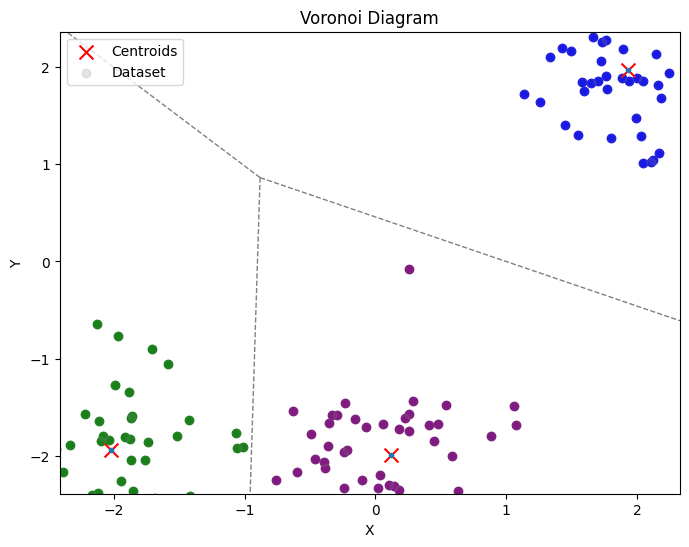

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.cluster import KMeans

# Generate random data for three clusters
np.random.seed(42)
cluster1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
cluster2 = np.random.normal(loc=[-2, -2], scale=0.5, size=(50, 2))
cluster3 = np.random.normal(loc=[0, -2], scale=0.5, size=(50, 2))

# Combine all data points into a single array
data = np.concatenate((cluster1, cluster2, cluster3), axis=0)

# Perform K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
centroids = kmeans.cluster_centers_

# Compute Voronoi diagram
vor = Voronoi(centroids)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Voronoi diagram
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=1)

# Plot the data points
colors = ['blue', 'green', 'purple']
for i in range(k):
    cluster_points = data[kmeans.labels_ == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i])

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')

# Plot the entire dataset
ax.scatter(data[:, 0], data[:, 1], color='gray', alpha=0.2, label='Dataset')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Voronoi Diagram')

# Show legend
ax.legend()

# Display the plot
plt.show()


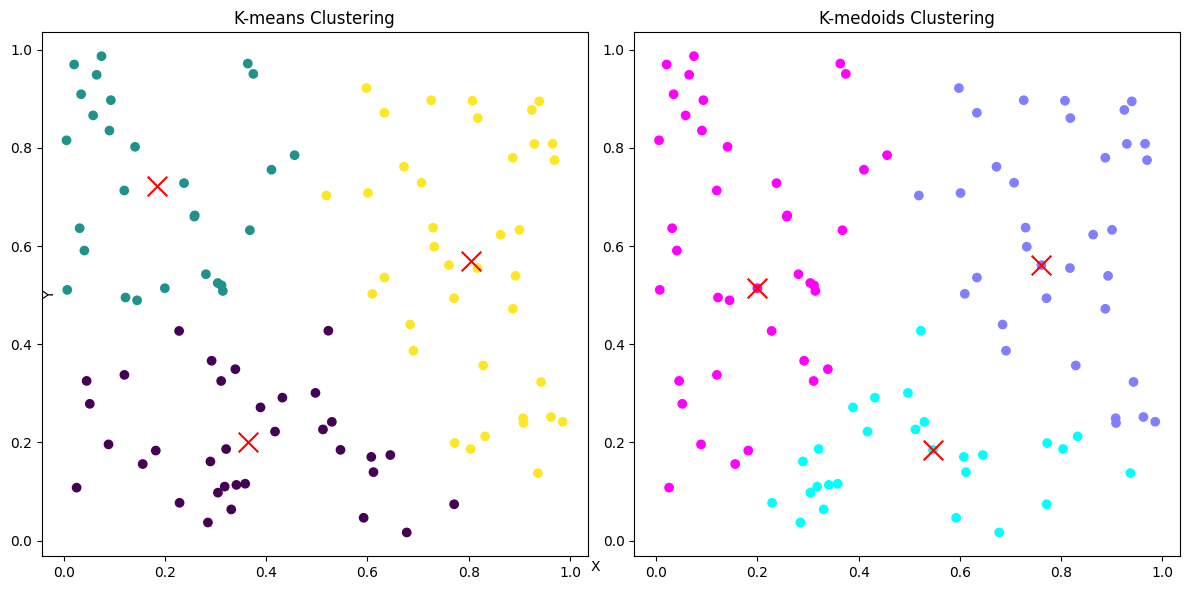

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Generate random data for clustering
np.random.seed(42)
data = np.random.rand(100, 2)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# Perform K-medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(data)
kmedoids_labels = kmedoids.labels_
kmedoids_medoids = data[kmedoids.medoid_indices_]

# Set up the figure with a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot K-means clustering
axs[0].scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='red', marker='x', s=200)
axs[0].set_title('K-means Clustering')

# Plot K-medoids clustering
axs[1].scatter(data[:, 0], data[:, 1], c=kmedoids_labels, cmap='cool')
axs[1].scatter(kmedoids_medoids[:, 0], kmedoids_medoids[:, 1], c='red', marker='x', s=200)
axs[1].set_title('K-medoids Clustering')

# Set common axis labels
fig.text(0.5, 0.04, 'X', ha='center')
fig.text(0.04, 0.5, 'Y', va='center', rotation='vertical')

# Display the plot
plt.tight_layout()
plt.show()


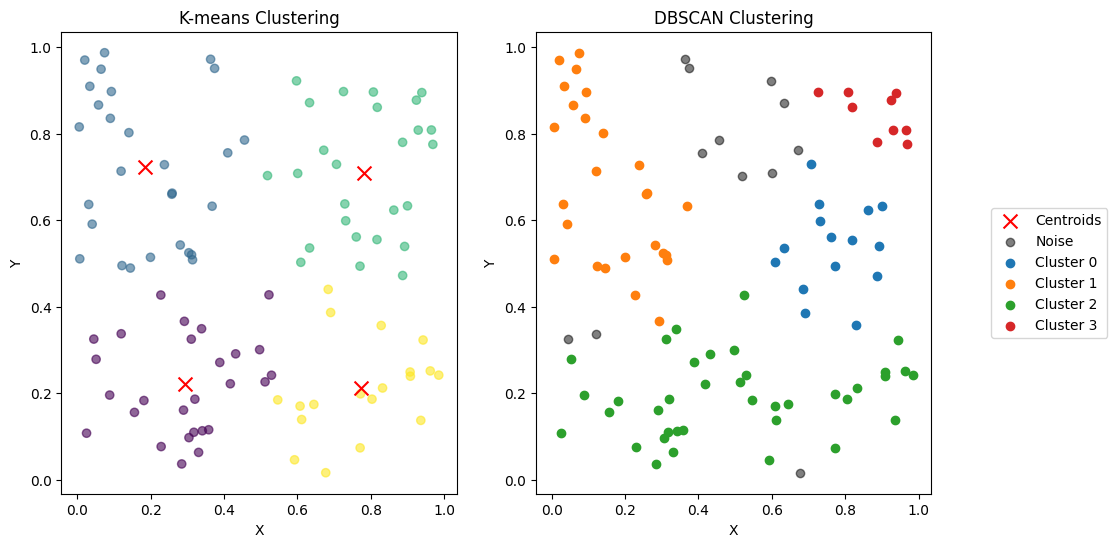

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN

# Generate random data for clustering
np.random.seed(42)
data = np.random.rand(100, 2)

# Set up the figure with a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_
kmeans_inertia = kmeans.inertia_

# Plot K-means clustering with inertia
axs[0].scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
axs[0].scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='red', marker='x', s=100, label='Centroids')
axs[0].set_title('K-means Clustering')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.13, min_samples=5)
dbscan_labels = dbscan.fit_predict(data)

# Get unique labels and the number of clusters
unique_labels = np.unique(dbscan_labels)
num_clusters = len(unique_labels) - 1  # Exclude noise points with label -1

# Plot DBSCAN clustering with inertia
for label in unique_labels:
    if label == -1:
        noise_mask = dbscan_labels == label
        axs[1].scatter(data[noise_mask, 0], data[noise_mask, 1], color='black', alpha=0.5, label='Noise')
    else:
        cluster_mask = dbscan_labels == label
        axs[1].scatter(data[cluster_mask, 0], data[cluster_mask, 1], label=f'Cluster {label}')

axs[1].set_title('DBSCAN Clustering')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

# Place the legend outside the plot
fig.legend(loc='center right')

# Adjust spacing between subplots and legend
plt.subplots_adjust(right=0.85)

# Display the plot
plt.show()
